# multi digit recognize

https://www.kaggle.com/competitions/digit-recognizer/data

# outline

- [1-packages](#1)
- [2-visualize](#2)
- [3-train](#3)
- [4-predict](#4)

<a name='1'></a>
## 1-packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import plotly.graph_objects as go


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load data
df_test = pd.read_csv('./test.csv')
df_train = pd.read_csv('./train.csv')


In [82]:
x = df_train.drop(columns='label').values
y = df_train['label'].values

In [16]:
#know about data
#each image: 4132 rows * 785 cols

df_train.sort_values('label')
df_train[df_train['label']==0]
df_train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [99]:
df_test.shape

(28000, 784)

In [100]:
x_test = df_test.values

<a name="2"></a>
## 2-visualize data

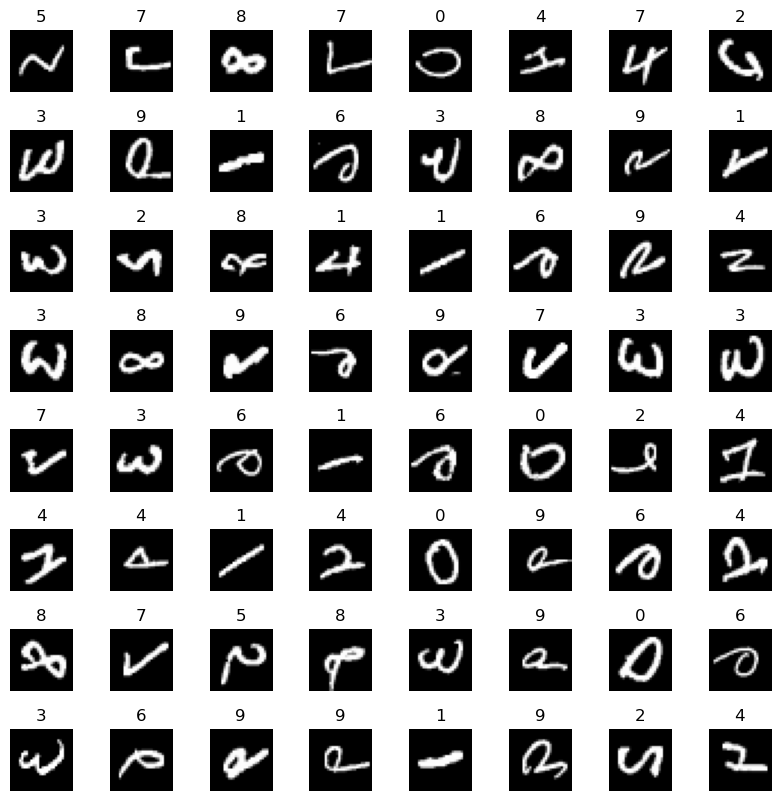

In [41]:
#visualize data, method 1

m,n = x.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)

#visualize random 8*8 image from x.shape
for i , ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    x_random_reshape = x[random_index].reshape((28,28)).T
    
    ax.imshow(x_random_reshape, cmap='gray')
    
    ax.set_title(y[random_index])
    ax.set_axis_off()

In [ ]:
#visualize, method 2
image_pixels = x

def visualize_image(image_pixels, index):
    image = image_pixels[index].reshape(28, 28)  # The images are 28x28 pixels
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {df_train['label'].iloc[index]}")
    plt.axis('off')
    plt.show()

# Visualize the first few images (you can change the index to view different images)
for i in range(5):
    visualize_image(image_pixels, i)

In [53]:
x.shape

(42000, 784)

<a name='3' ></a>

## train model

how to choose last layer activation function?

- accuracy: bigger better

- most loss function below, smaller better

- epochs: epochs increase and loss decrease; pay attention to loss increase which means overfiting


| Loss Function                        | Description                                                         | Formula                                    |
|--------------------------------------|---------------------------------------------------------------------|--------------------------------------------|
| Mean Squared Error (MSE)             | Used for regression problems.                                       | `MSE = (1/n) * Σ(y_true - y_pred)^2`       |
| Binary Cross-Entropy Loss (BCE)      | Used for binary classification problems with a single output neuron.| `BCE = - (y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))` |
| Categorical Cross-Entropy Loss (CCE) | Used for multiclass classification problems with multiple output neurons (one-hot encoded labels).| `CCE = - Σ(y_true * log(y_pred))`          |
| Sparse Categorical Cross-Entropy Loss (SCCE) | Similar to Categorical Cross-Entropy, but used when the true labels are integers (not one-hot encoded).| `SCCE = - log(y_pred[true_class])`         |
| Hinge Loss                           | Used in Support Vector Machines (SVMs) for binary classification.   | `Hinge Loss = max(0, 1 - y_true * y_pred)`|


In [56]:
model = Sequential(
    [
        tf.keras.Input(shape = (n,)),
        Dense(28, activation = 'relu', name='l1'),
        Dense(15, activation = 'relu', name ='l2'),
        Dense(10, activation = 'relu', name ='l3'),
    ], name='digit_model'
)

In [58]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

)

history = model.fit(
    x,y, epochs = 100
)

Epoch 1/100
1313/1313 [==============================] - 4s 2ms/step - loss: 0.1067
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1068
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0983
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0966
Epoch 5/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0965
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0927
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0925
Epoch 8/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0906
Epoch 9/100
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0903
Epoch 10/100
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0925
Epoch 11/100
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0861
Epoch 12/100
1313/1313 [==============================] - 18s 14ms/st

1313/1313 [==============================] - 7s 5ms/step - loss: 0.0608
Epoch 98/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0523
Epoch 99/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0563
Epoch 100/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0599


In [63]:
def plot_loss_tf(history):
    fig, ax = plt.subplots(1,1, figsize = (4,3))
    #widgvis(fig)
    ax.plot(history.history['loss'], label = 'loss')
    ax.set_ylim([0,2])
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.legend()
    ax.grid(True)
    plt.show()

In [81]:
#around 70 epochs enough

loss=history.history['loss']
index=list(range(len(y)))

trace = go.Scatter(x=index,y=loss, mode='lines')

layout = go.Layout(title='Loss Line while Epochs', xaxis = dict(title='index'), yaxis = dict(title='loss'))
fig = go.Figure(data = [trace], layout=layout)
fig.show()

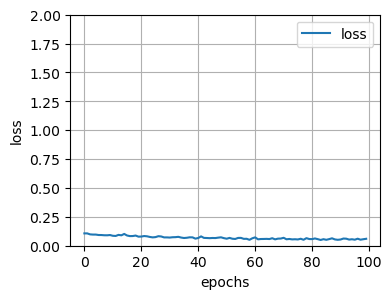

In [64]:
plot_loss_tf(history)

<a name='4'></a>

## prediction


In [87]:
# display single image
def display_digit(x):
    fig, ax = plt.subplots(1,1,figsize=(0.5,0.5))
    #widgvis(fig)
    x_reshaped = x.reshape((28,28)).T
    ax.imshow(x_reshaped,cmap='gray')
    plt.show()
    

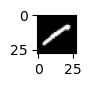

1/1 [==============================] - 0s 25ms/step
prediction: [[  0.       108.17766    0.         0.         0.        24.687292
    0.         0.         0.         0.      ]]


max index: 1


prediction probability vector: tf.Tensor(
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 5.50295e-37
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]], shape=(1, 10), dtype=float32)


total prediction: 1.0


In [97]:
# random select one to validate

img = x[0] 

display_digit(img)
prediction = model.predict(img.reshape(1,n))


print("prediction:", prediction)
print('\n')
print("max index:",np.argmax(prediction))

prediction_p = tf.nn.softmax(prediction)
print('\n')
print("prediction probability vector:",prediction_p)
print('\n')
print("total prediction:", np.sum(prediction_p))
print('\n')
print("total prediction:", np.argmax(prediction_p)) #retun with max p

In [127]:
#train whole x_test
x_test
prediction = model.predict(x_test)
prediction_p = tf.nn.softmax(prediction)
np.sum(prediction_p)

875/875 [==============================] - 1s 2ms/step


28000.0

In [131]:
predict_result = []
for i in prediction_p:
    predict_result.append(np.argmax(i))

In [134]:
df_result = pd.read_csv('./sample_submission.csv')
df_result

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [135]:
df_result['Label'] = predict_result

In [139]:
df_result.to_csv('./sample_submission.csv',index=False)